# Gomes Teixeira Filipe

# DIA2

In [ ]:
# pip installations
!pip install matplotlib
!pip install numpy==1.18
!pip install pandas
!pip install seaborn
!pip install scikit-image
!pip install sklearn
!pip install patool pyunpack

In [7]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import joblib
import pyunpack

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import of the datasets

In [ ]:
#extract insight csv drom his zip
pyunpack.Archive("./datasets/youtube_videos.rar").extractall("./datasets/")

In [8]:
# youtube videos dataset for the insight
insight = pd.read_csv("./datasets/youtube_videos.csv")

# transcoding mesurment dataset
transcoding = pd.read_csv("./datasets/transcoding_mesurment.csv")

## Analyse of the data

In [9]:
insight.head(10)

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
5,WCgt-AactyY,31,1166,1183,640,480,24.00,0.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
6,WCgt-AactyY,31,736,646,480,360,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
7,WCgt-AactyY,31,715,641,480,360,24.00,24.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
8,WCgt-AactyY,31,762,641,480,360,24.00,24.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
9,WCgt-AactyY,31,370,305,320,240,24.00,24.00,flv1,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [175]:
insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168286 entries, 0 to 168285
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                168286 non-null  object 
 1   duration          168286 non-null  int64  
 2   bitrate           168286 non-null  int64  
 3   bitrate(video)    168286 non-null  int64  
 4   height            168286 non-null  int64  
 5   width             168286 non-null  int64  
 6   frame rate        168286 non-null  float64
 7   frame rate(est.)  168286 non-null  float64
 8   codec             168286 non-null  object 
 9   category          168286 non-null  object 
 10  url               168286 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 14.1+ MB


Has we can see, the insight dataset possess 11 columns (10 columns if we ignore the id).<br>
We possess 168286 videos and not 1.6 millions.<br>
There is no null values.<br>
We observe 2 categorical columns (codec, category) and 8 numerical columns.<br><br>


Now we will describe the meaning of each columns :

- id : the id of video on youtube

- duration : the duration of the video (seconds)

- bitrate : the number of Kbits (audio + video) conveyed per seconds

- bitrate(video) : the number of Kbits (only video) conveyed per seconds

- height : the height of the video in pixels

- width : the width of the video in pixels

- frame rate : the number of image shown during one second

- frame rate(est.) : it's an estimation of the frame rate of the video

- codec : the computer program used for the compression and the decompression of a video in order to speed up the upload on the web

- category : the category (ex: Music, Gaming, ...) of the video on youtube

- url : the link of the video


now that we presented the columns of the dataset, we will delete the useless columns such has the url (it's unique for each video) and the frame rate(est.) (we don't need an estimation of the frame rate since we have the true value)

In [176]:
insight = insight.drop(['frame rate(est.)', 'url'], axis=1)

In [177]:
transcoding.head(10)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456
5,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1920,1080,102072,6.320
6,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,176,144,23132,0.728
7,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,320,240,25164,0.944
8,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,480,360,29236,1.476
9,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,640,480,34312,1.964


In [178]:
transcoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

The transcoding dataset possess 22 columns (21 columns if we ignore the id).<br>
This dataset possess 68784 lines.<br>
There is no null values.<br>
We can observe 2 categorical columns (codec, o_codec) and 20 numerical columns.<br><br>

Now we will describe the meaning of each columns :

- id : the id of video on youtube

- duration : the duration of the video (seconds)

- codec : the computer program used for the compression and the decompression of a video in order to speed up the upload on the web

- width : the width of the video in pixels

- height : the height of the video in pixels

- bitrate : the number of Kbits (audio + video) conveyed per seconds

- framerate : the number of image shown during one second

- i : i correspond to the i-frames. The i-frames are frames examined independently from the others frames, you can usually find them interspersed with b-frames and p-frames in a compressed video.

- p : p correspond to the p-frames. The p-frames are frames who follow the i-frames. They only contain the data that have changed from the preceding i-frame.

- b : b correspond to the b-frames. The b-frames are frames who contains only the data that have changed from the preceding frame or are different from the data of the next frame.

- frames : the number of frames of the video.

- i_size : the total size in byte of i-frames in the video

- p_size : the total size in byte of p-frames in the video

- b_size : the total size in byte of b-frames in the video

- size : the total size in byte of the video (i_size + p_size + b_size)

- o_codec : output codec used for transcoding

- o_bitrate : output bitrate used for transcoding

- o_framerate : output framerate used for transcoding

- o_width : output width in pixel used for transcoding

- o_height : output height used in pixel for transcoding

- umem : total codec allocated memory for transcoding

- utime : total transcoding time for transcoding

Now that we learnt the various data of the two dataset, we will start by analysing them.

In [179]:
insight.describe()

,duration,bitrate,bitrate(video),height,width,frame rate
count,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000
mean,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592
std,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615
min,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000
25%,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000
50%,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000
75%,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000
max,25845.000000,22421.00000,22229.000000,2592.000000,1944.000000,59.940000


If we look at the median (50%), we see that in average we have:

- the videos last 145 seconds (has the average is below the mean, this allow us to understand that the majority of the videos possess a short duration)

- the bitrate at 459 Kbits with 349 Kbits of video and 110 Kbits of audio

- with 480*360 pixels, the videos have in average we have a 4:3 Aspect Ratio Resolution of 360p

- we have in average 30 fps (29.92 rounded) which correspond to the frame rate of a film camera (we need at least 30 fps in order to have a fluid video)

In [180]:
transcoding.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In this dataset, we still observe that the majority of the videos posses a short duration.

We will analyse the average of the data not present in the insight :

- the video have in average 5628 frames with inside 80 i-frames, 5515 p-frames and 0 b-frames. Therefore, the frame the most used is the p-frame, then after the i-frame. The b-frame is almost not used.

- when we compare the bitrate with the o_bitrate, sometimes the bitrate is higher meanwhile sometimes the o_bitrate is higher than the bitrate. We can conclude there is no dependency between the bitrate ant the o_bitrate

- in average the utime is 4 secondes and the mean is 10 seconds

### Plot of the Categories

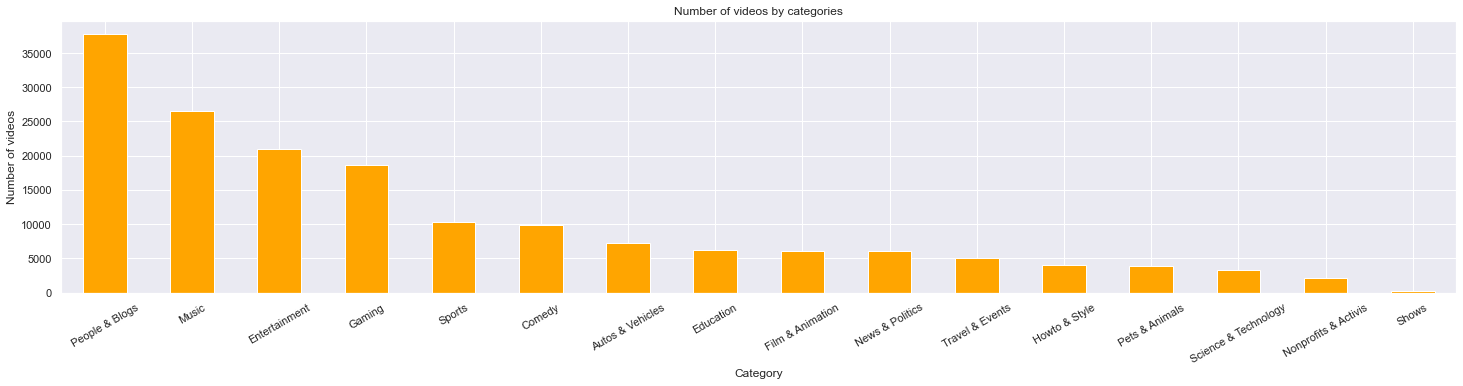

In [181]:
insight["category"].value_counts().plot(kind='bar', figsize = (25,5),rot = 30, color = 'orange')
plt.xlabel("Category")
plt.ylabel('Number of videos')
plt.title("Number of videos by categories")
plt.show()

### Plot of the Codec

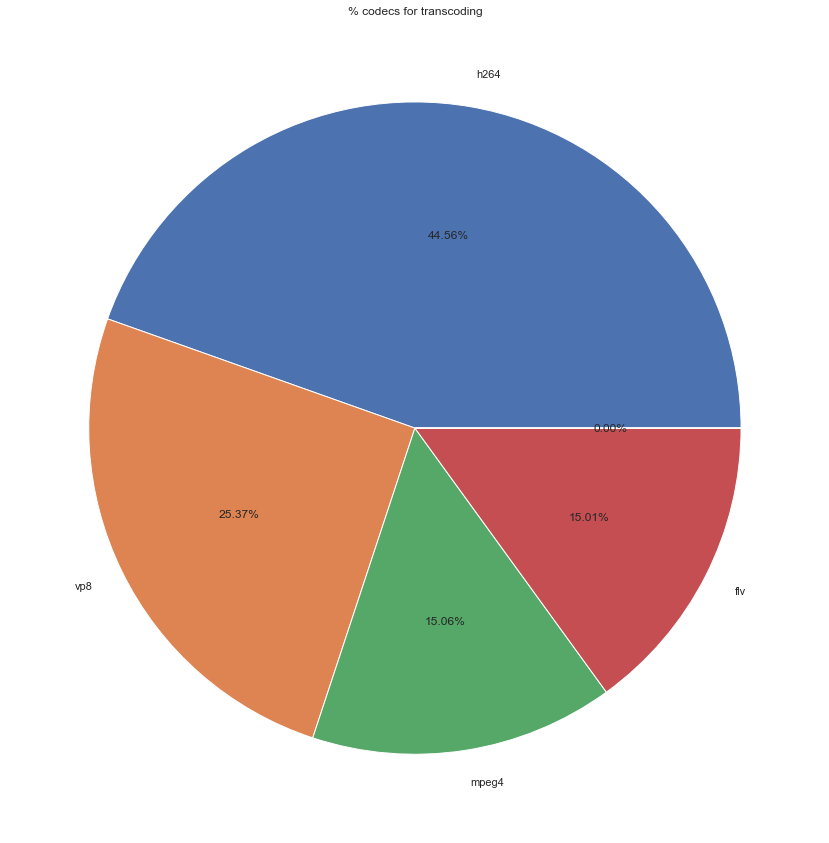

In [200]:
plt.pie(insight["codec"].value_counts(), labels = ["h264", "vp8", "mpeg4", "flv", None], autopct='%1.2f%%')
plt.title("% codecs for transcoding")
plt.show()

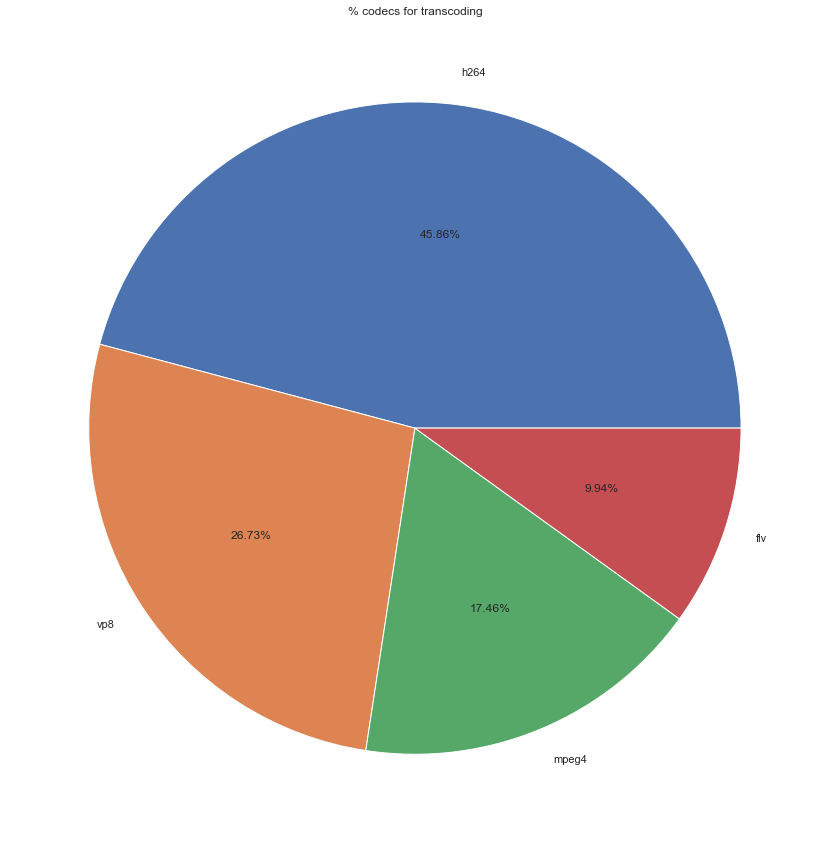

In [191]:
plt.pie(transcoding["codec"].value_counts(), labels = ["h264", "vp8", "mpeg4", "flv"], autopct='%1.2f%%')
plt.title("% codecs for transcoding")
plt.show()

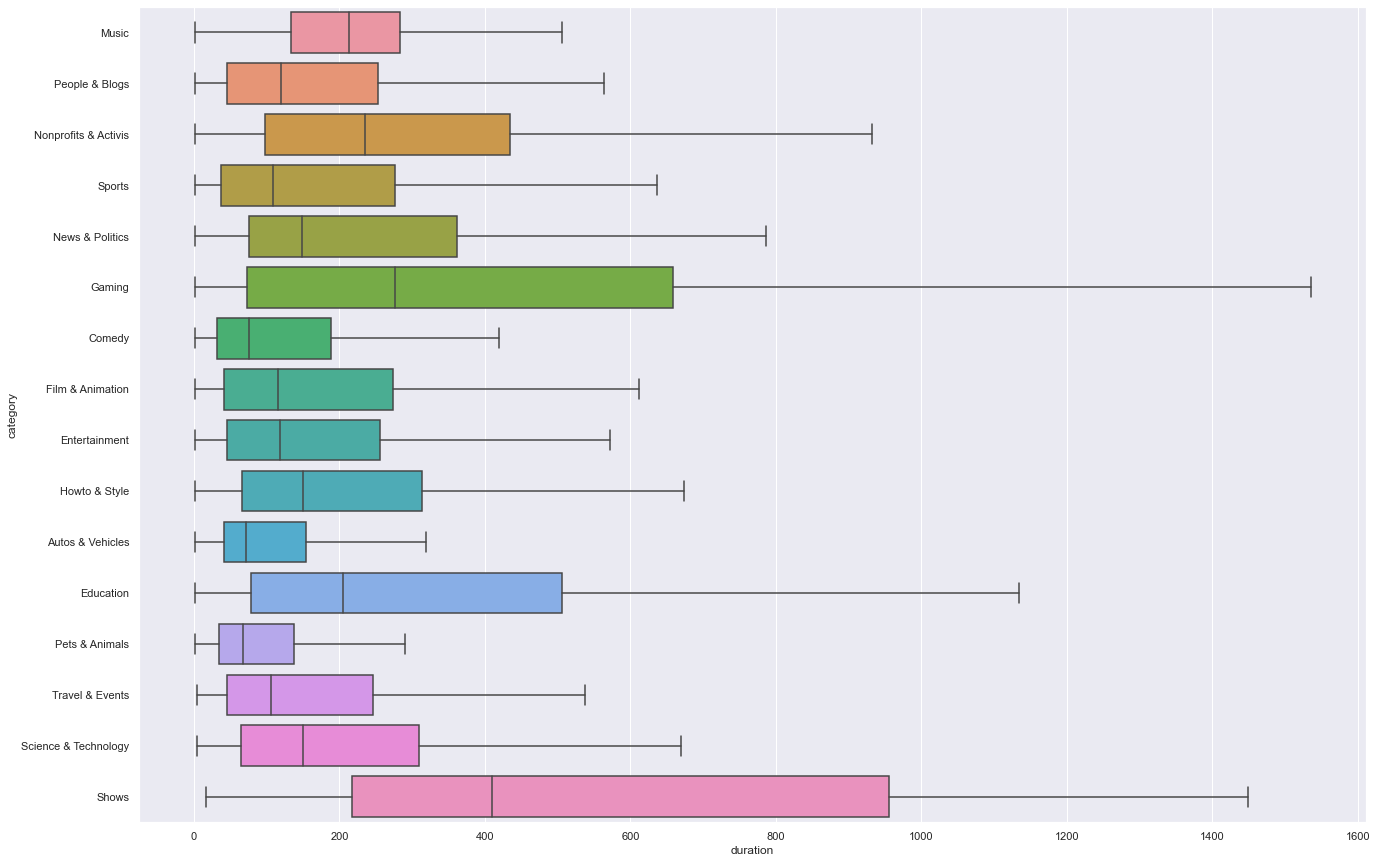

In [184]:
d_category = insight[["category", "duration"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="duration", y="category", data=d_category, showfliers = False)

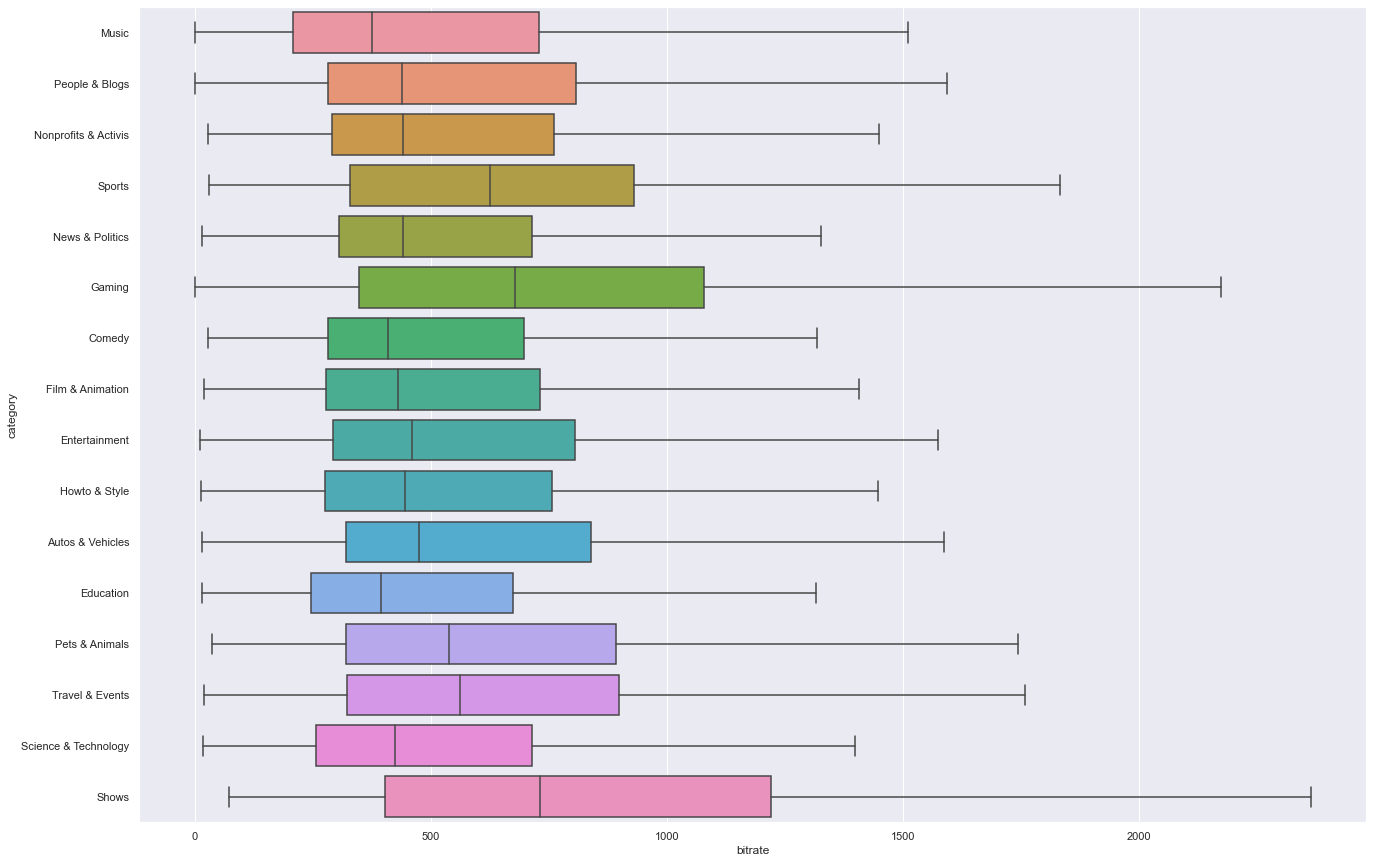

In [185]:
d_category = insight[["category", "bitrate"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="bitrate", y="category", data=d_category, showfliers = False)

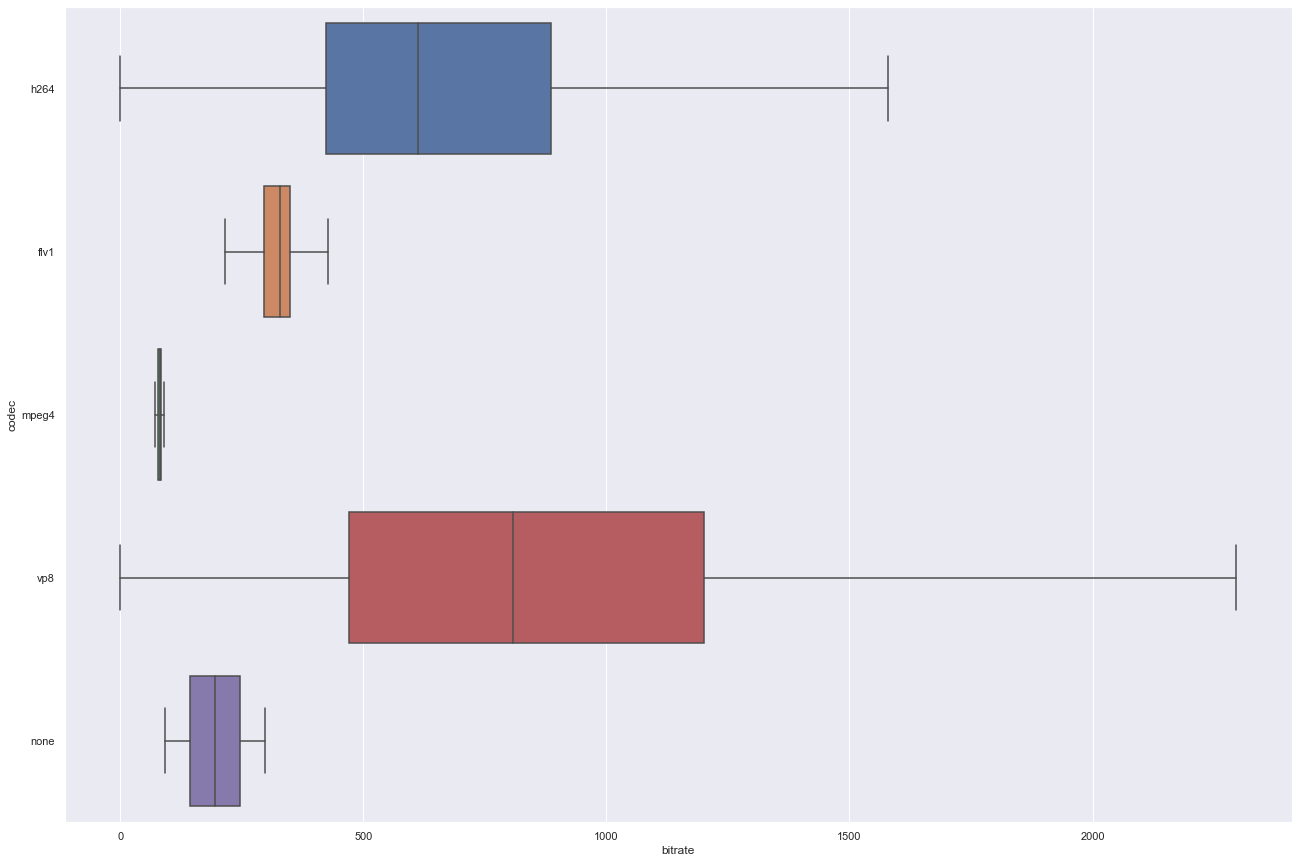

In [186]:
d_category = insight[["codec", "bitrate"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="bitrate", y="codec", data=d_category, showfliers = False)

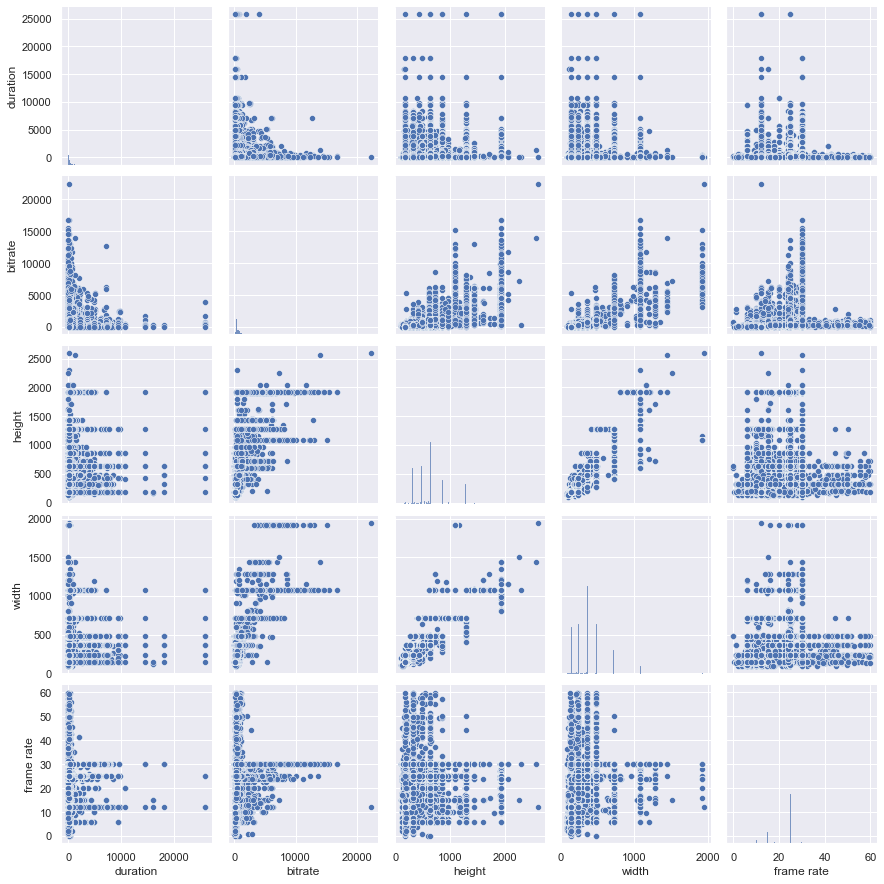

In [187]:
sns.pairplot(insight[['duration', 'bitrate', 'height', 'width', 'frame rate']])

In [18]:
result = transcoding.corr()
result = result[['utime']].iloc[:len(result[['utime']])-1]
result = result[result['utime'] > 0.01].sort_values(by="utime")
result

,utime
i,0.018489
frames,0.033115
p,0.033201
i_size,0.064711
framerate,0.079336
size,0.097096
p_size,0.097644
o_framerate,0.104043
height,0.128479
width,0.129861


We observe a good linear correlation of utime with o_bitrate, o_height, o_width and umem.

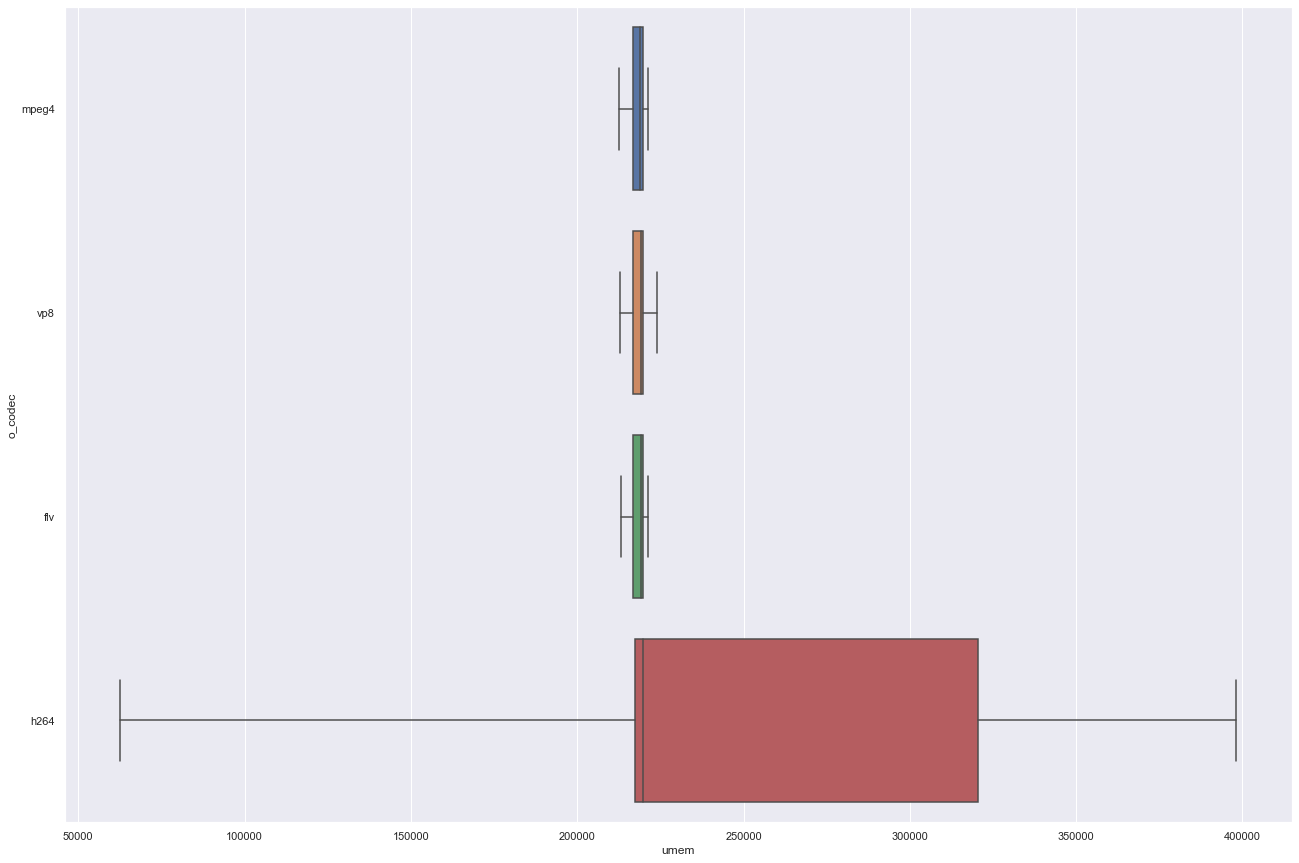

In [19]:
d_category = transcoding[["o_codec", "umem"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="umem", y="o_codec", data=d_category, showfliers = False)

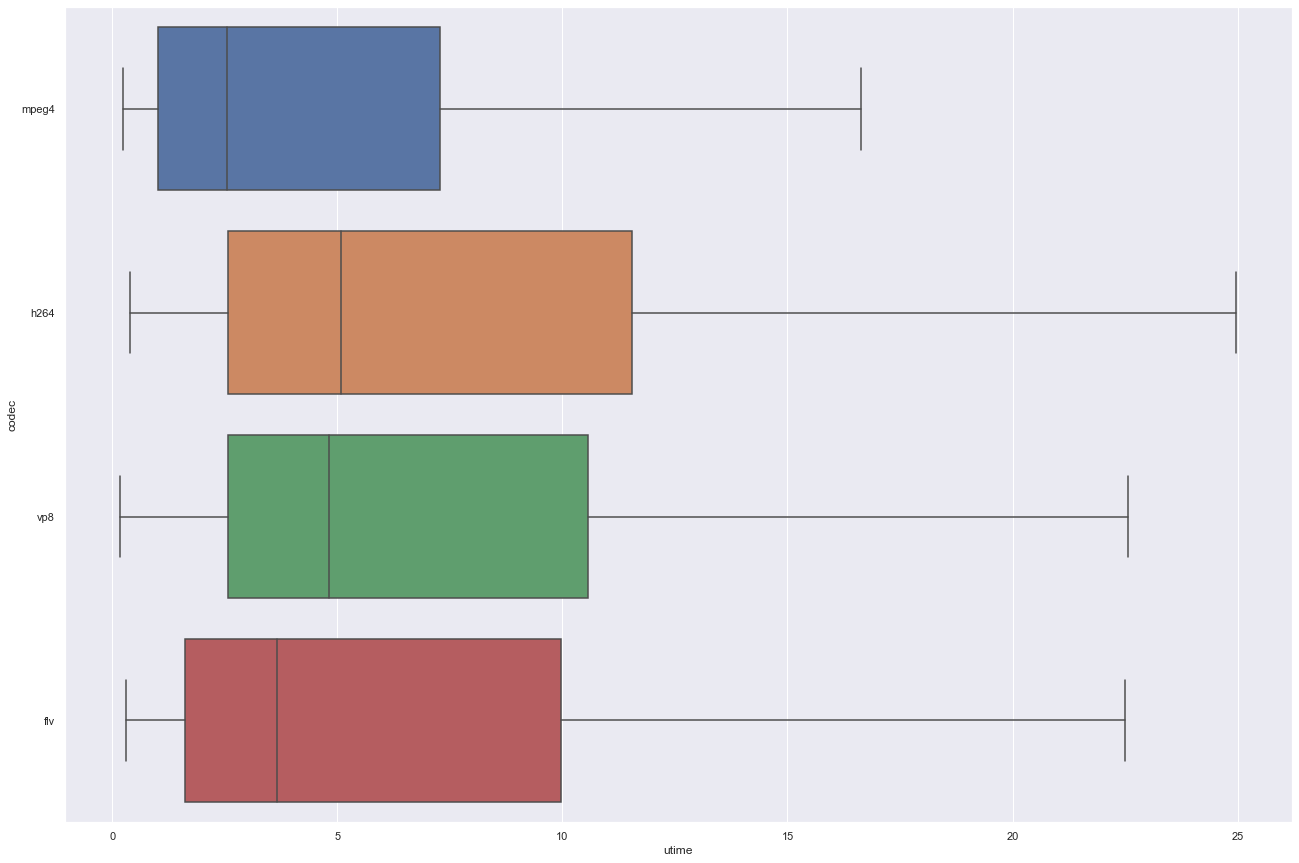

In [20]:
d_category = transcoding[["codec", "utime"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="utime", y="codec", data=d_category, showfliers = False)

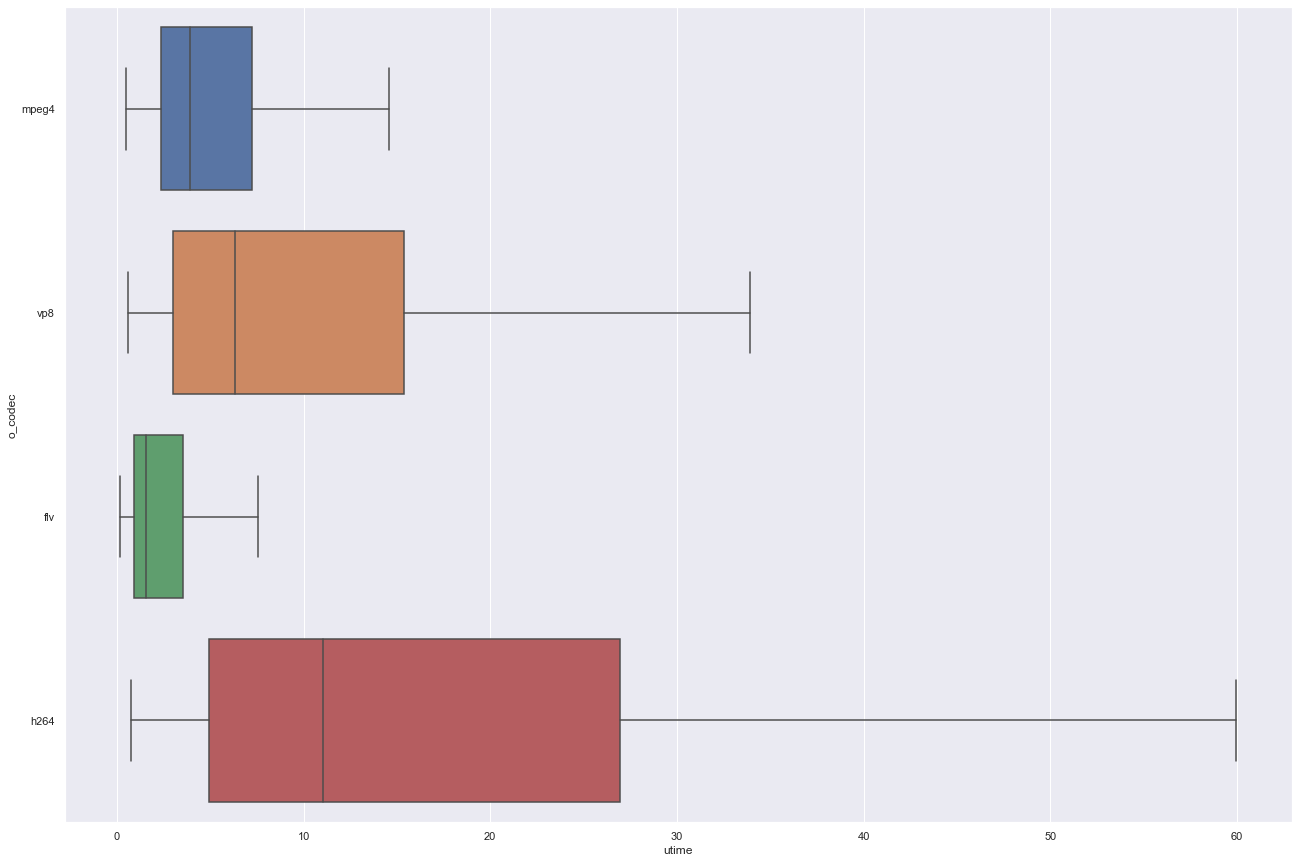

In [21]:
d_category = transcoding[["o_codec", "utime"]]
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(22, 15)})
ax = sns.boxplot(x="utime", y="o_codec", data=d_category, showfliers = False)

## Machine Learning

We first drop the id columns from the dataset because it will be useless for our models

In [158]:
transcoding = transcoding.drop(['id'], axis=1)

Now we convert the codec values into numerical values in order to allow the models to use them

In [207]:
# flv = 0
# h264 = 1
# mpeg4 = 2
# vp8 = 3
codec_encoder = preprocessing.LabelEncoder()
codec_encoder.fit(transcoding['codec'])

transcoding['codec'] = codec_encoder.transform(transcoding['codec'])
transcoding['o_codec'] = codec_encoder.transform(transcoding['o_codec'])

In [211]:
transcoding.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,2,176,144,54590,12.0,27,1537,0,...,825054,0,889537,2,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,2,176,144,54590,12.0,27,1537,0,...,825054,0,889537,2,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,2,176,144,54590,12.0,27,1537,0,...,825054,0,889537,2,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,2,176,144,54590,12.0,27,1537,0,...,825054,0,889537,2,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,2,176,144,54590,12.0,27,1537,0,...,825054,0,889537,2,56000,12.0,1280,720,58528,3.456


We create the training, validation and test datasets

In [29]:
y = transcoding["utime"]
X, X_test, y, y_test = train_test_split(transcoding.drop(['utime'], axis=1),y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4)

before starting the models, we create the dataset of the score

In [30]:
d_score = pd.DataFrame(columns=['Model', 'Score'])

#### Bayesian Ridge Regression

In [31]:
model_brr = BayesianRidge().fit(X_train, y_train)
score_brr = model_brr.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'Bayesian Ridge Regression', 'Score': score_brr}, ignore_index=True)
score_brr

0.5978119641241004

#### Linear Regression

In [32]:
model_lr = LinearRegression().fit(X_train, y_train)
score_lr = model_lr.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'Linear Regression', 'Score': score_lr}, ignore_index=True)
score_lr

0.5978045856677494

#### Decision Tree Regressor

In [33]:
model_dtr = DecisionTreeRegressor().fit(X_train, y_train)
score_dtr = model_dtr.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'Decision Tree Regressor', 'Score': score_dtr}, ignore_index=True)
score_dtr

0.9617122664490906

#### Boosting

In [34]:
model_b = GradientBoostingRegressor(random_state=20).fit(X_train, y_train)
score_b = model_b.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'Boosting', 'Score': score_b}, ignore_index=True)
score_b

0.9289097007021189

#### K Neighbors Regressor

In [35]:
model_knr = KNeighborsRegressor().fit(X_train, y_train)
score_knr = model_knr.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'K Neighbors Regressor', 'Score': score_knr}, ignore_index=True)
score_knr

0.7075704266096103

#### Random Forest Regressor

In [36]:
model_rfr = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
score_rfr = model_rfr.score(X_valid, y_valid)
d_score = d_score.append({'Model': 'Random Forest Regressor', 'Score': score_rfr}, ignore_index=True)
score_rfr

0.6304438266639001

In [37]:
d_score

,Model,Score
0,Bayesian Ridge Regression,0.597812
1,Linear Regression,0.597805
2,Decision Tree Regressor,0.961712
3,Boosting,0.928910
4,K Neighbors Regressor,0.707570
5,Random Forest Regressor,0.630444


<AxesSubplot:xlabel='Model'>

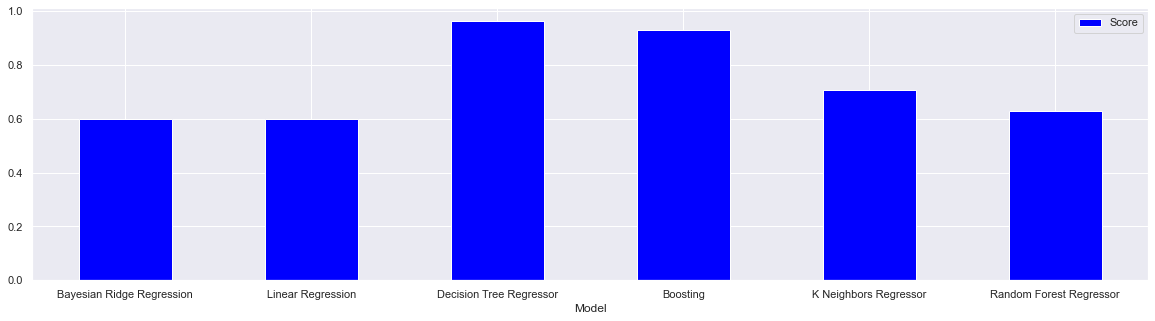

In [47]:
d_score.plot(kind='bar',x="Model", y="Score", figsize = (20,5), rot=0, color = 'blue')

Has we can see, the Decision Tree Regressor is the best model among the 6 used models.
Therefore we will do an exploration on this model.

In [106]:
parameters = {'max_depth': range(1, 40)}

model_dtr_depth = DecisionTreeRegressor(criterion = "mse", random_state = 100)

tree_depth = GridSearchCV(model_dtr_depth, parameters, cv=n_folds, return_train_score=True, scoring="r2")
tree_depth.fit(X, y)
scores_depth = pd.DataFrame(tree_depth.cv_results_)

In [118]:
scores_depth.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027140,0.003532,0.003071,0.000160,1,{'max_depth': 1},0.440360,0.455507,0.453873,0.449835,...,0.449674,0.005277,39,0.452762,0.448746,0.449447,0.450592,0.450887,0.450487,0.001376
1,0.041428,0.002723,0.002794,0.000426,2,{'max_depth': 2},0.612008,0.607356,0.617137,0.624924,...,0.615176,0.005841,38,0.616963,0.617568,0.615863,0.613866,0.616575,0.616167,0.001276
2,0.055871,0.000460,0.003001,0.000019,3,{'max_depth': 3},0.749967,0.752912,0.753693,0.761020,...,0.754522,0.003647,37,0.757616,0.756297,0.756958,0.755203,0.756523,0.756519,0.000797
3,0.075984,0.006464,0.002806,0.000377,4,{'max_depth': 4},0.803291,0.810729,0.816043,0.819879,...,0.810573,0.006754,36,0.818489,0.816543,0.816213,0.815004,0.817888,0.816827,0.001238
4,0.083618,0.001190,0.003171,0.000398,5,{'max_depth': 5},0.847404,0.852303,0.858569,0.859811,...,0.853837,0.004676,35,0.858307,0.856638,0.855048,0.854981,0.857899,0.856575,0.001388


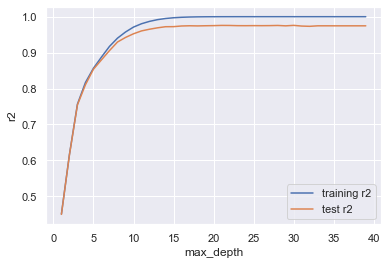

In [108]:
plt.figure()
plt.plot("param_max_depth", "mean_train_score", label="training r2", data=scores_depth)
plt.plot("param_max_depth", "mean_test_score", label="test r2", data=scores_depth)
plt.xlabel("max_depth")
plt.ylabel("r2")
plt.legend()
plt.show()

In [128]:
scores_depth.sort_values(by="mean_test_score", ascending=False).iloc[0]

mean_fit_time                  0.287105
std_fit_time                   0.003666
mean_score_time                0.006206
std_score_time                 0.000740
param_max_depth                      30
params                {'max_depth': 30}
split0_test_score              0.974488
split1_test_score              0.977907
split2_test_score              0.973211
split3_test_score              0.978511
split4_test_score              0.975176
mean_test_score                0.975859
std_test_score                 0.002029
rank_test_score                       1
split0_train_score             1.000000
split1_train_score             1.000000
split2_train_score             1.000000
split3_train_score             1.000000
split4_train_score             1.000000
mean_train_score               1.000000
std_train_score                0.000000
Name: 29, dtype: object

In [124]:
parameters = {'min_samples_leaf': range(1, 10, 1)}

model_dtr_sl = DecisionTreeRegressor(criterion = "mse", random_state = 100)

tree_sl = GridSearchCV(model_dtr_sl, parameters, cv=n_folds, return_train_score=True, scoring="r2")
tree_sl.fit(X, y)
scores_sl = pd.DataFrame(tree_sl.cv_results_)

In [125]:
scores_sl.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.307524,0.025584,0.006392,0.001380,1,{'min_samples_leaf': 1},0.975729,0.976282,0.972637,0.973487,...,0.974603,0.001362,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.651274e-09
1,0.287903,0.017325,0.006586,0.001365,2,{'min_samples_leaf': 2},0.975848,0.976674,0.973351,0.976888,...,0.975265,0.001517,1,0.997332,0.997425,0.997494,0.997323,0.997390,0.997393,6.299348e-05
2,0.241850,0.003939,0.004196,0.000411,3,{'min_samples_leaf': 3},0.975538,0.972626,0.970812,0.972522,...,0.972734,0.001544,3,0.994674,0.994049,0.994567,0.994294,0.994526,0.994422,2.239876e-04
3,0.229713,0.003349,0.005219,0.001175,4,{'min_samples_leaf': 4},0.973286,0.970215,0.968057,0.970417,...,0.970259,0.001727,4,0.991631,0.991483,0.991801,0.990909,0.991807,0.991526,3.311538e-04
4,0.227409,0.003264,0.004571,0.000489,5,{'min_samples_leaf': 5},0.970079,0.966880,0.967008,0.966427,...,0.967083,0.001656,5,0.988484,0.988853,0.989000,0.988063,0.988838,0.988648,3.377343e-04


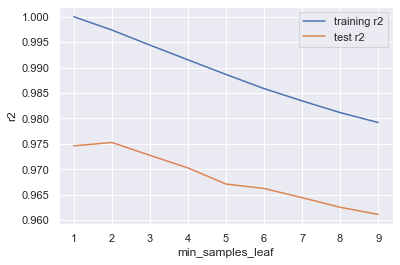

In [126]:
plt.figure()
plt.plot("param_min_samples_leaf", "mean_train_score", label="training r2", data=scores_sl)
plt.plot("param_min_samples_leaf", "mean_test_score", label="test r2", data=scores_sl)
plt.xlabel("min_samples_leaf")
plt.ylabel("r2")
plt.legend()
plt.show()

In [121]:
parameters = {'min_samples_split': range(2, 10, 1)}

model_dtr_ss = DecisionTreeRegressor(criterion = "mse", random_state = 100)

tree_ss = GridSearchCV(model_dtr_ss, parameters, cv=n_folds, return_train_score=True, scoring="r2")
tree_ss.fit(X, y)
scores_ss = pd.DataFrame(tree_ss.cv_results_)

In [122]:
scores_ss.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.293951,0.006165,0.006095,0.001117,2,{'min_samples_split': 2},0.975729,0.976282,0.972637,0.973487,...,0.974603,0.001362,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.651274e-09
1,0.288298,0.019958,0.005404,0.000798,3,{'min_samples_split': 3},0.974458,0.975297,0.975266,0.978242,...,0.974953,0.002153,1,0.999542,0.999354,0.999365,0.999274,0.999409,0.999389,8.812812e-05
2,0.273083,0.017896,0.006590,0.001501,4,{'min_samples_split': 4},0.975959,0.976091,0.973956,0.974560,...,0.974677,0.001235,2,0.998641,0.998605,0.998430,0.998514,0.998541,0.998546,7.329594e-05
3,0.279678,0.024196,0.005218,0.000972,5,{'min_samples_split': 5},0.974728,0.977555,0.972292,0.974823,...,0.974430,0.001865,5,0.997745,0.997573,0.997581,0.997356,0.997694,0.997590,1.340483e-04
4,0.257204,0.008971,0.005606,0.001359,6,{'min_samples_split': 6},0.974336,0.976685,0.973399,0.976615,...,0.974527,0.001944,4,0.996773,0.996581,0.996378,0.996446,0.996516,0.996539,1.355113e-04


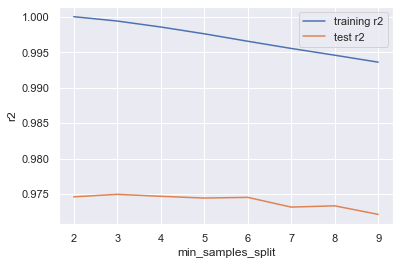

In [123]:
plt.figure()
plt.plot("param_min_samples_split", "mean_train_score", label="training r2", data=scores_ss)
plt.plot("param_min_samples_split", "mean_test_score", label="test r2", data=scores_ss)
plt.xlabel("min_samples_split")
plt.ylabel("r2")
plt.legend()
plt.show()

In [130]:
param_grid = {
    'max_depth': range(25, 35, 1),
    'min_samples_leaf': range(1, 3, 1),
    'min_samples_split': range(2, 4, 1),
    'criterion': ["mse", "mae"]
}

model_dtr = DecisionTreeRegressor()
grid_cv_dtr = GridSearchCV(model_dtr, param_grid, cv=3, verbose=2)
grid_cv_dtr.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(25, 35),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 4)})

In [131]:
print(f"R-Squared : {grid_cv_dtr.best_score_}")
print(f"Best Hyperparameters : \n{grid_cv_dtr.best_params_}")

R-Squared : 0.970993839849835
Best Hyperparameters : 
{'criterion': 'mse', 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2}


so our best model is the Decision Tree Regressor with :
- criterion : mse
- max_depth : 26
- min_samples_leaf : 1
- min_samples_split : 2

In [135]:
model_dtr_best_hp = DecisionTreeRegressor(criterion='mse', max_depth=26, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
model_dtr = DecisionTreeRegressor().fit(X_train, y_train)
score_final_test_best_hp = model_dtr_best_hp.score(X_test, y_test)
score_final_test = model_dtr.score(X_test, y_test)
print(f"best hyperparameters : {score_final_test_best_hp}\nclassic : {score_final_test}")

best hyperparameters : 0.9671445698582063
classic : 0.9491373784953243


In [201]:
joblib.dump(model_dtr_best_hp, "./PDA/api/model.sav")

['./PDA/api/model.sav']